# Pipeline Automation

**Introduction to MLRun - a**


Tutorial steps:
- [**Run full workflow with train, optimze & deploy**](#full-workflow)

In [ ]:
%pip install -r requirements.txt

<a id="define-project"></a>
## Define MLRun project and set all mlrun function

You should create, load, or use (get) an **{ref}`MLRun Project <Projects>`** that holds all your functions and assets ([setup.py](./src/setup.py))


In [1]:
from src.setup import create_and_set_project

project = create_and_set_project(name="huggingface-demo")

> 2023-02-15 08:52:36,602 [warning] Failed resolving version info. Ignoring and using defaults
> 2023-02-15 08:52:39,216 [warning] Server or client version is unstable. Assuming compatible: {'server_version': '1.3.0-rc22', 'client_version': '0.0.0+unstable'}
> 2023-02-15 08:52:39,254 [info] loaded project huggingface-demo from MLRun DB


Names with underscore '_' are about to be deprecated, use dashes '-' instead.Replacing underscores with dashes.


<a id="full-workflow"></a>
## Run full workflow with train, optimze & deploy

You should use `project.set_workflow()` for load your workflow into the project, and when you can run it by using `project.run()` while the param name is key.


In [2]:
# Register the workflow file:
workflow_name = "training_workflow"
project.set_workflow(workflow_name, "src/training_workflow.py")

# Save the project:
project.save()

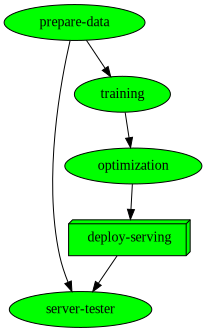

uid,start,state,name,parameters,results
...63497a64,Feb 15 09:06:56,completed,server_tester,label_column=labelsendpoint=http://huggingface-demo-davids-serving-huggingface-demo-davids.default-tenant.app.cto-office.iguazio-cd1.com/,count=100error_count=0avg_latency=133809min_latency=98034max_latency=287317
...bed86bed,Feb 15 09:02:49,completed,optimization,model_path=store://artifacts/huggingface-demo-davids/trained_model:fc536105-4abc-4e7c-ae2f-8f9b60234001,
...77ecdef3,Feb 15 08:53:18,completed,training,pretrained_tokenizer=distilbert-base-uncasedpretrained_model=distilbert-base-uncased,loss=0.0506learning_rate=0.0eval_loss=0.16978879272937775eval_accuracy=0.93eval_f1=0.8108108108108109eval_runtime=12.4607eval_samples_per_second=24.076eval_steps_per_second=1.525train_runtime=521.2708train_samples_per_second=5.755train_steps_per_second=0.361total_flos=34259380977408.0
...9ec7d54f,Feb 15 08:52:51,completed,prepare_data,dataset_name=Shayanvsf/US_Airline_Sentiment,


In [3]:
workflow_run = project.run(
    name=workflow_name,
    arguments={
        "dataset_name": "Shayanvsf/US_Airline_Sentiment",
        "pretrained_tokenizer": "distilbert-base-uncased",
        "pretrained_model": "distilbert-base-uncased",
        "num_epochs": 2
    },
    watch=True,
    dirty=True
)

Here we can see how the workflow looks on our UI & Also the result of the trainer and the server_tester

<img src="./images/workflow.png" alt="workflow" width="1200"/>

<img src="./images/latancy.png" alt="latancy" width="1200"/>

In [4]:
serving_function = project.get_function("serving")

In [5]:
body = "i love flying"
response = serving_function.invoke(path='/predict', body=body)
print(response)

> 2023-02-15 09:07:29,870 [info] invoking function: {'method': 'POST', 'path': 'http://nuclio-huggingface-demo-davids-serving.default-tenant.svc.cluster.local:8080/predict'}
['The sentiment is POSITIVE', 'The prediction score is 0.5098247528076172']


### Gradio front-end

Gradio is a friendly web interface that we demonstrate here how to use easily for submitting predictions to our real-time pipeline and to get the results as well!

For more information, please see [gradio page](https://gradio.app/)

After running this sell try again to insert 'i love flying' and see the new result

In [6]:
from src.gradio_front import build_and_launch

build_and_launch(serving_func=serving_function)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://984ae6c8-f75b-4fb1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
